<img src = "https://imgur.com/t8ptjcy.jpg"  align = "center">

<h1><font size = 5>Visualisasi Heart Failure</font></h1>

## Sapa salam dulu

Halo teman-teman, pada tulisan kali ini saya mau mencoba memvisualisasikan Data Heart Failure menggunakan Python.

Data ini didapat dari [**Kaggle**](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

**Catatan**: Terdapat 12 kolom (fitur) yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Tapi ditulisan ini kita fokus untuk memvisualisasikan terlebih dahulu data ini. Yuk mari kita coba!

------------

## Izin dulu sama google colab ya!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Yuk kita jelajah data ini dengan *pandas* <a id="0"></a>

*pandas* is salah satu package/library yang mendukung pembacaan dan penulisan data. Lengkapnya yuk cek [PANDAS](http://pandas.pydata.org/)

pertama-tama kita harus meng-import package yang akan kita gunakan

In [2]:
import numpy as np 
import pandas as pd 

lalu setelah itu kita membaca data kita

In [3]:
data = pd.read_csv('/content/drive/My Drive/GITHUB/Heart Failure Prediction/jantung.csv')

Nah, kalau ini kita sedang melihat 5 data teratas dari data kita

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Kalau ini kita sedang melihat 5 data terbawah dari data kita

In [5]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


`info()` berfungsi untuk mendapatkan informasi dasar mengenai data yang kita gunakan

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Untuk melihat dimensi data kita dapat menggunakan .shape

In [7]:
data.shape

(299, 13)

Untuk mengetahui ringkasan statistika data kita, kita bisa menggunakan `describe()`

In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


---
# Visualisasi Data Menggunakan Matplotlib<a id="8"></a>

## Matplotlib <a id="10"></a>

Matplotlib adalah package/library pada Python yang dapat membuat visualisasi 2D dan dapat menghasilkan plot dengan kualitas tinggi. Yuk di *cek* [Matplotlib](http://matplotlib.org/).  

### Jika kita ingin memvisualisasikan banyaknya pasien anaemia

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
df_anaemia = data['anaemia'].value_counts().reset_index()
df_anaemia.columns = ['anaemia', 'count']
fig = px.bar(df_anaemia, x='anaemia', y="count", orientation='v', title='Banyaknya Pasien Anaemia', width=500)
fig.show()

In [43]:
df_anaemia.columns = ['anaemia', 'count']

In [44]:
df_anaemia

,anaemia,count
0,0,170
1,1,129


In [45]:
fig = px.pie(
    df_anaemia, 
    values='count', 
    names="anaemia", 
    title='Anaemia bar chart'
)

fig.show()

Jika kita ingin memvisualisasikan Data Kematian Anaemia

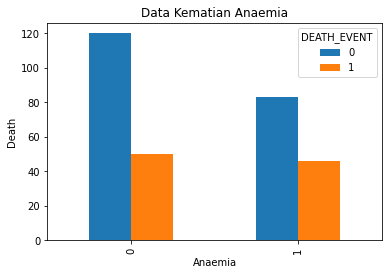

In [36]:
pd.crosstab(data.anaemia  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Data Kematian Anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

### Jika kita ingin memvisualisasikan banyaknya pasien Diabetes

In [49]:
df_diabetes = data['diabetes'].value_counts().reset_index()
df_diabetes.columns = ['diabetes', 'count']
fig = px.bar(df_diabetes, x='diabetes', y="count", orientation='v', title='Banyaknya Pasien Diabetes', width=500)
fig.show()

In [48]:
df_diabetes

,diabetes,count
0,0,174
1,1,125


In [50]:
fig = px.pie(
    df_diabetes, 
    values='count', 
    names="diabetes", 
    title='Diabetes bar chart'
)

fig.show()

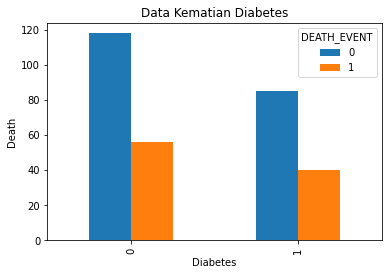

In [51]:
pd.crosstab(data.diabetes  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Data Kematian Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Death')
plt.show()